In [1]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [6]:
data_df = pd.read_csv('auto-mpg.csv', header = 0, engine='python')

In [7]:
print('데이터셋 크기: ', data_df.shape)
data_df.head() # head는 상위 5개만 보여줌

데이터셋 크기:  (397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
# axis = 0 -> 행 삭제 , 1 -> 열 삭제
# inplace = False -> 원본 데이터 그대로 새로운 데이터 return
# inplace = True -> 원본 데이터를 갈아 끼움 return None
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis = 1, inplace = False)

data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504.0,12.0,70
1,15.0,8,350.0,3693.0,11.5,70
2,18.0,8,318.0,3436.0,11.0,70
3,16.0,8,304.0,3433.0,12.0,70
4,17.0,8,302.0,3449.0,10.5,70


In [9]:
print('데이터 셋 크기: ', data_df.shape)

데이터 셋 크기:  (397, 6)


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   weight        397 non-null    float64
 4   acceleration  397 non-null    float64
 5   model_year    397 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 18.7 KB


In [11]:
# 선형 회구 분석 
from sklearn.linear_model import LinearRegression
# 데이터셋 분리 작업
from sklearn.model_selection import train_test_split
# 성능 측정
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
Y = data_df['mpg'] # 종속 변수 Y
X = data_df.drop(['mpg'], axis = 1, inplace=False) # 종속 변수 Y 피처를 제외한 나머지를 독립변수


In [13]:
# 데이터를 7:3 비율로 만드는 것이 test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [14]:
# 선형 회귀 분석 모델 객체
lr = LinearRegression()

In [15]:
# 모델 훈련 Y_train -> series
lr.fit(X_train.values, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# 평가 데이터에 대한 예측 수행 -> 예측 결과로 Y_predict 구하기
Y_predict = lr.predict(X_test.values)

In [17]:
# 평가지표 구축
# 회귀분석은 지도학습 (정답 데이터 앎) 따라서 평가 데이터의 결과값과 예측 결과값의 오차를 계싼

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RSME : {1:.3f}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE: 9.811, RSME : 3.132
R^2(Variance score) : 0.826


In [18]:
print('Y 절편 값: ', np.round(lr.intercept_,2))
print('회귀 계수 값: ', np.round(lr.coef_,2))

Y 절편 값:  -18.21
회귀 계수 값:  [-0.13  0.01 -0.01  0.19  0.78]


In [19]:
# 자동차 연비에 끼치는 피처의 영향을 분석
coef = pd.Series(data = np.round(lr.coef_,2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.78
acceleration    0.19
displacement    0.01
weight         -0.01
cylinders      -0.13
dtype: float64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

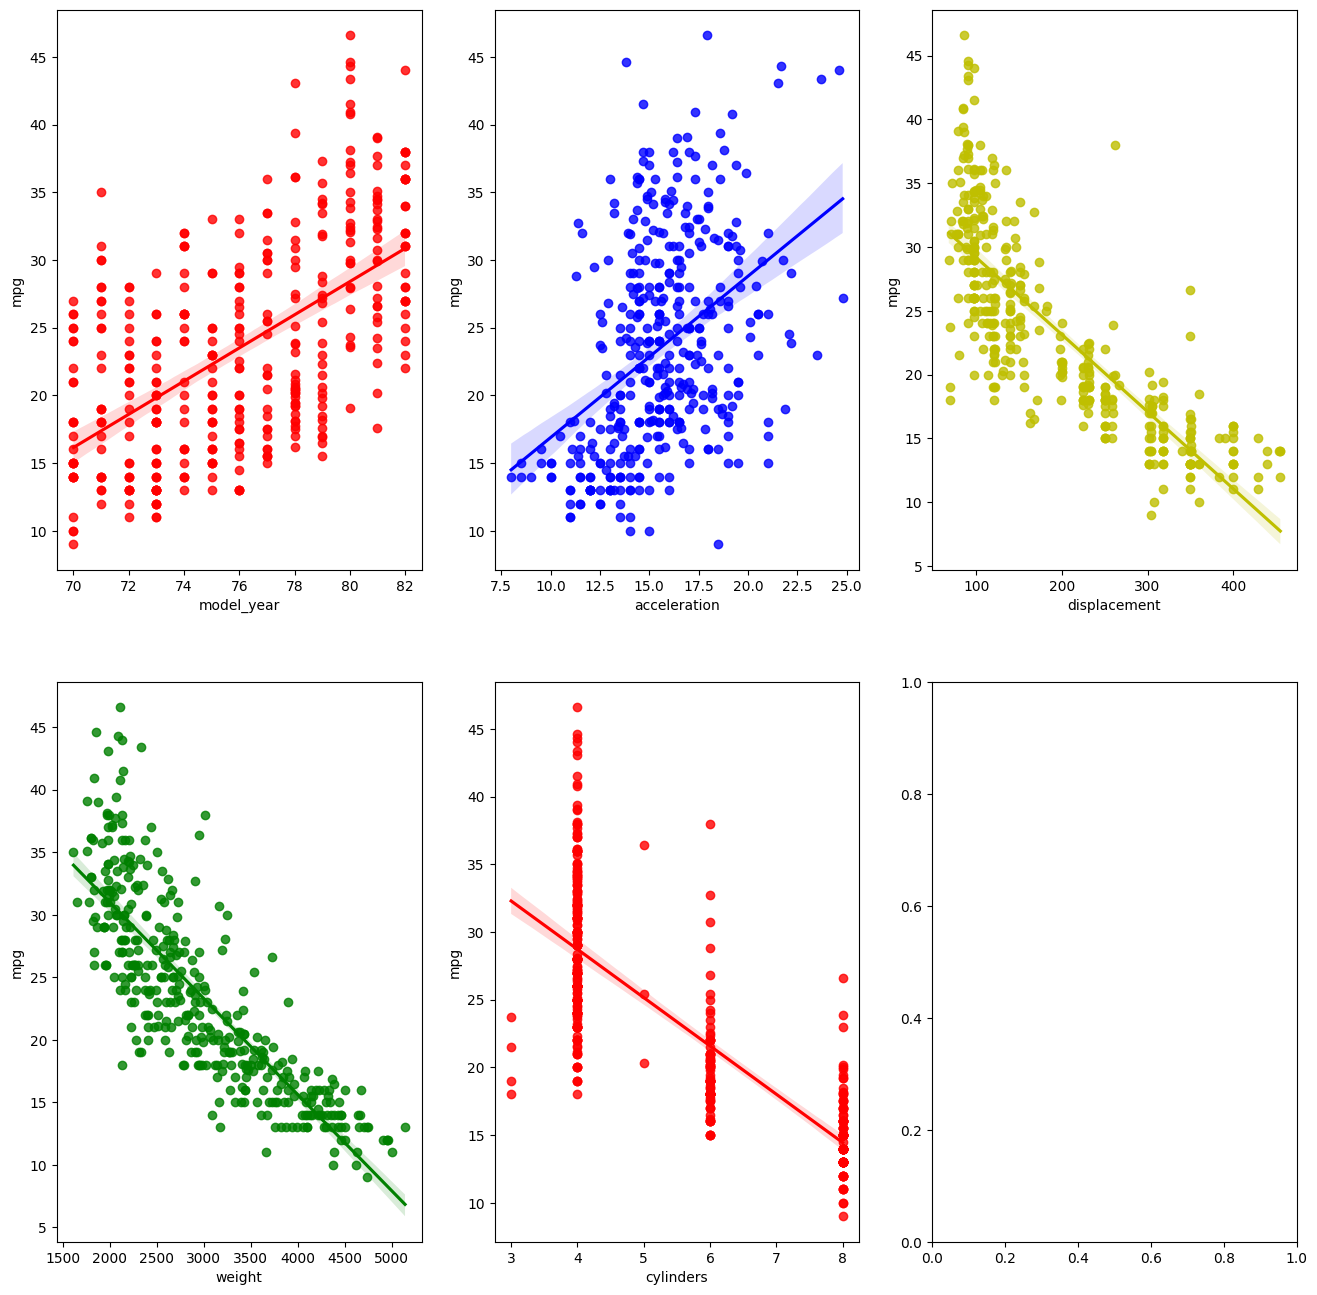

In [21]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r','b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    
    sns.regplot(x = feature, y = 'mpg', data=data_df, ax = axs[row][col], color = plot_color[i])

In [22]:
print("연비를 예측하고 싶은 차의 정보를 입력하세요.")

cylinders= int(input('cylinders: '))
displacement = int(input('displacement:'))
weight = int(input('weight: '))
acceleration = int(input('acceleration: '))
model_year = int(input('model_year: '))

연비를 예측하고 싶은 차의 정보를 입력하세요.


In [23]:
mpg_predict = lr.predict([[cylinders, displacement, weight, acceleration, model_year]])

In [24]:
print('이 자동차의 예상 연비(MPG)는 %.2f입니다.'%mpg_predict)

이 자동차의 예상 연비(MPG)는 42.11입니다.


/var/folders/n1/fwqfkrg14bv45svdswv4v5h80000gn/T/ipykernel_61523/320424014.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('이 자동차의 예상 연비(MPG)는 %.2f입니다.'%mpg_predict)
